# MODELO DE ISING 2D - Algoritmo de Metrópolis

# ------------------------------------------------------

## Tarea:

Hacer la simulación y obtener los resultados con las gráficas de las diapositivas.

Obtener los exponentes del sistema sin el sesgo de confirmación de ya saber cuánto valen.

## Entrega:

Hacer un trabajo en latex sobre la física estudiada. No tiene interés en ver ningún código.


# ------------------------------------------------------

## Preámbulos

### Consideraciones:
- Debemos dar unos parámetros adecuados para cada temperatura. Lo que funcione bien para $T$ altas y bajas puede no funcionar bien cerca de la crítica
- A $T$ alta una buena configuración inicial puede ser aleatoria.
- A $T$ cercana a $T_C$ no hay una condicion inicial buena y sencilla. Podemos coger la configuración final de la temperatura más cercana a la crítica que tengamos.
- Por tanto, es útil guardar todas las configuraciones finales que simulemos.
- Dejamos pasar bastantes pasos Monte Carlo entre medidas. A temperaturas altas y bajamos podemos tomar medidas cada pocos pasos Monte Carlo. Cerca de $T_C$ hay que tomar medidas cada más tiempo, para dejar que las medidas estén menos correlacionadas. Hay que ajustar este parámetro junto con la temepratura.
    #### Eficiencia:
    - Es preferible utilizar índices de $1$ a $L^2$ $\rightarrow$ Generamos menos números aleatorios, más eficiente
    - En vez de verificar cuál es el vecino de un nodo cada vez, crearemos tablas de cuál es el vecino cada vez $\rightarrow$ Menos cuentas, más eficiencia
    - Sólo calculamos $h(j)$ una vez por cada $T$
        ##### Python:
        - Utilizar numpy siempre que sea posible
        - Evitar el uso de ciclos *for*
        - No graficar cosas, guardar los resultados y graficar a parte
    #### Características:
    - $1$ paso Monte Carlo consiste en $N$ intentos de cambio de los espines (darle en media a todos los espines una oportunidad de cambiar).
    - Condiciones de contorno periódicas $\rightarrow$ Evitamos efectos de borde (caso más cercano a $L = \inf $ )
    - Termalización: Dejamos avanzar el sistema varios pasos Monte Carlo antes de empezar a medir (no nos interesa el sistema hasta que se termaliza)
### Problemas:
- Encontraremos efectos de tamaño finito
- Además, los errores crecen en nuestra zona de interés (cerca de $T_C$). La varianza y el tiempo de correlación aumentan cerca de $T_C$, lo que aumenta el error

## Simulación

In [287]:
# importación de librerías
import numpy as np

#### Parámetros Globales

In [288]:
# Parámetros Globales
global L, N
L = 50 # Longitud de un lado del retículo cuadrado
N = L*L # Número de nodos



In [289]:
# Función para calcular los vecinos de cada uno de los nodos de la red. SÓLO SE HACE UNA VEZ
def get_neighbors():
    n1 = [0] * (L * L)
    n2 = [0] * (L * L)
    n3 = [0] * (L * L)
    n4 = [0] * (L * L)
    
    for iy in range(L):
        for ix in range(L):
            i = iy * L + ix
            ix1 = (ix + 1) % L
            n1[i] = iy * L + ix1
            iy2 = (iy + 1) % L
            n2[i] = iy2 * L + ix
            ix3 = (ix - 1) % L
            n3[i] = iy * L + ix3
            iy4 = (iy - 1) % L
            n4[i] = iy4 * L + ix
    
    return n1, n2, n3, n4

    
n1, n2, n3, n4 = get_neighbors()


#### Parámetros específicos para cada T


In [290]:

T = 1 # Temperatura
M = 100 # Número de medidas a realizar
M0 = 20 # Número de pasos Monte Carlo hasta termalizar
mc = 10 # Número de pasos Monte Carlo entre cada medida

print(f"Número de pasos Monte Carlo a realizar: {M*mc}")

Número de pasos Monte Carlo a realizar: 1000


#### Cálculo del parámetro de aceptación

In [291]:
# Cálculo del parámetro de aceptación
h = np.zeros(5)

for j in np.linspace(-4, 4, 5, dtype=int):
    h[j] = np.min([1.0, np.exp(-2*j/T)])
    

#### Condición inicial y termalización

In [292]:
# Condición inicial aleatoria
s = np.random.choice([1,-1], N)

# Termalización
print(f"Termalizamos con {M0} pasos MC ({M0*N} iteraciones)")
for _ in range(M0*N):
    i = np.random.randint(N) # Escogemos un índice al azar
    ib = s[i] *( s[n1[i]] + s[n2[i]] + s[n3[i]] + s[n4[i]] )
    if np.random.rand() < h[ib]: s[i] = -s[i]

# np.reshape(s, (L,L))

Termalizamos con 20 pasos MC (50000 iteraciones)


##### Inicialización de los promedios

In [293]:
RM = np.zeros(M) # magnetización a lo largo de la evolución del sistema
RM0 = np.zeros(M) # magnetización a lo largo de la evolución del sistema

c = 0. # Correlación media
rm = 0. # Magnetización media
rm2 = 0. # magnetización media ^ 2
rm1 = np.abs(np.sum(s))/N

### Evolución del sistema

In [294]:
for j in range(M): # Número de medidas a realizar
    print(f"Medida {j}")
    for _ in range(mc*N): # Número de pasos Monte Carlo entre medidas
        i = np.random.randint(N) # Escogemos un índice al azar
        ib = s[i] *( s[n1[i]] + s[n2[i]] + s[n3[i]] + s[n4[i]] )
        if np.random.rand() < h[ib]: s[i] = -s[i]
        
    rm0 = np.abs(np.sum(s))/N # Magnetización actual
    RM0[j] = rm0
    rm = rm + rm0
    RM[j] = rm
    rm2 = rm2 + rm0*rm0
    c = c + rm0*rm1
    rm1 = rm0

Medida 0
Medida 1
Medida 2
Medida 3
Medida 4
Medida 5
Medida 6
Medida 7
Medida 8
Medida 9
Medida 10
Medida 11
Medida 12
Medida 13
Medida 14
Medida 15
Medida 16
Medida 17
Medida 18
Medida 19
Medida 20
Medida 21
Medida 22
Medida 23


Medida 24
Medida 25
Medida 26
Medida 27
Medida 28
Medida 29
Medida 30
Medida 31
Medida 32
Medida 33
Medida 34
Medida 35
Medida 36
Medida 37
Medida 38
Medida 39
Medida 40
Medida 41
Medida 42
Medida 43
Medida 44
Medida 45
Medida 46
Medida 47
Medida 48
Medida 49
Medida 50
Medida 51
Medida 52
Medida 53
Medida 54
Medida 55
Medida 56
Medida 57
Medida 58
Medida 59
Medida 60
Medida 61
Medida 62
Medida 63
Medida 64
Medida 65
Medida 66
Medida 67
Medida 68
Medida 69
Medida 70
Medida 71
Medida 72
Medida 73
Medida 74
Medida 75
Medida 76
Medida 77
Medida 78
Medida 79
Medida 80
Medida 81
Medida 82
Medida 83
Medida 84
Medida 85
Medida 86
Medida 87
Medida 88
Medida 89
Medida 90
Medida 91
Medida 92
Medida 93
Medida 94
Medida 95
Medida 96
Medida 97
Medida 98
Medida 99


In [295]:
rm = rm/M
rm2 = rm2/M - rm*rm
c = (c/M - rm*rm)/rm2
if c != 1.0: tau = c/(1.-c)
error = np.sqrt(rm2*(2*tau+1)/M)


T, rm, rm2, error, mc*tau, c


(1,
 0.7833600000000003,
 0.10610988799999965,
 0.20700225220470844,
 196.9130037052808,
 0.9516705097266693)

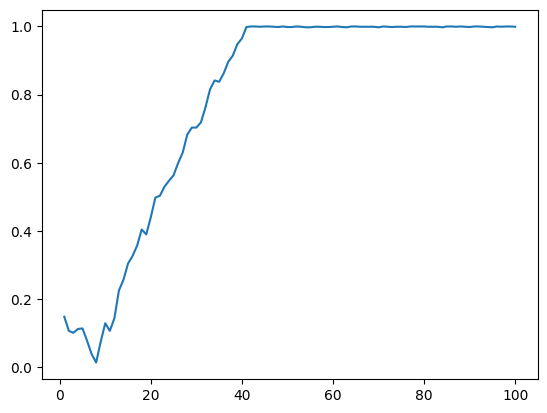

In [296]:
import matplotlib.pyplot as plt
# plt.plot(range(M+1)[1:], RM)
plt.plot(range(M+1)[1:], RM0)

In [297]:
RM0

array([0.148 , 0.1064, 0.1008, 0.112 , 0.1136, 0.0776, 0.0384, 0.0136,
       0.0744, 0.1288, 0.1064, 0.1432, 0.2248, 0.2568, 0.304 , 0.3264,
       0.3568, 0.404 , 0.3896, 0.44  , 0.4976, 0.5032, 0.5296, 0.5472,
       0.5632, 0.5992, 0.6296, 0.6824, 0.7032, 0.7032, 0.7184, 0.7624,
       0.8152, 0.8416, 0.8376, 0.8624, 0.896 , 0.9144, 0.948 , 0.9648,
       0.9984, 1.    , 1.    , 0.9992, 1.    , 1.    , 0.9992, 0.9984,
       1.    , 0.9984, 0.9984, 1.    , 0.9992, 0.9976, 0.9976, 0.9992,
       0.9992, 0.9984, 0.9984, 0.9992, 1.    , 0.9984, 0.9976, 1.    ,
       1.    , 0.9992, 0.9992, 0.9992, 0.9992, 0.9976, 1.    , 0.9992,
       0.9984, 0.9992, 0.9992, 0.9984, 1.    , 1.    , 1.    , 1.    ,
       0.9992, 0.9992, 0.9992, 0.9976, 1.    , 1.    , 0.9992, 1.    ,
       0.9992, 0.9984, 1.    , 1.    , 0.9992, 0.9984, 0.9976, 1.    ,
       0.9992, 1.    , 1.    , 0.9992])

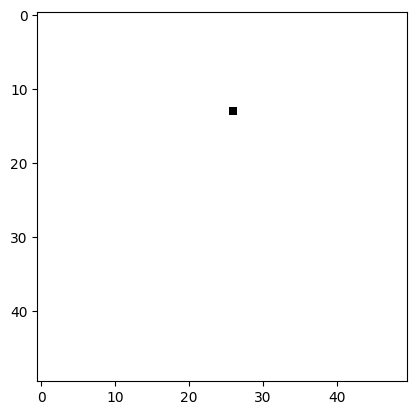

In [298]:
plt.imshow(np.reshape(s, (L,L)), cmap='binary')